In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import folium

In [ ]:
#Loading a shapefile
path = r"Shape_data/local_unit.shp"

In [ ]:
#Reading the file
gdf = gpd.read_file(path)

In [36]:
#Display the first few rows
print(gdf.head())

   STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  


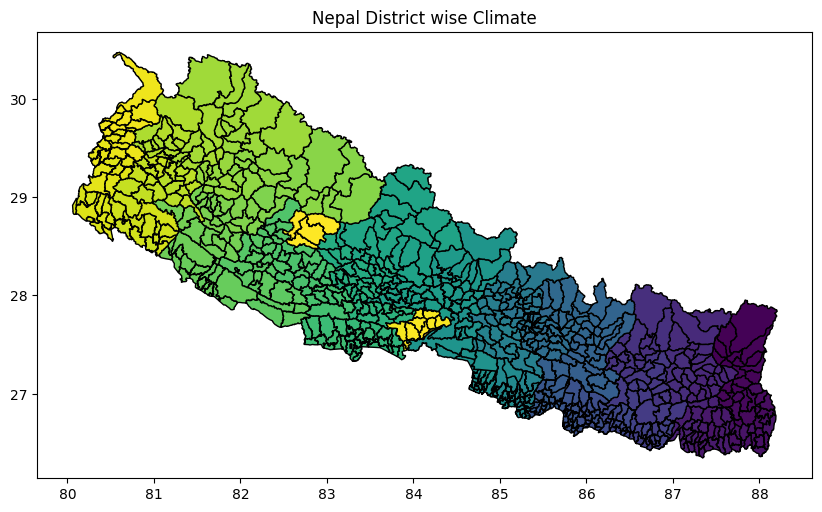

In [ ]:
#plot
gdf.plot(figsize = (10, 6), edgecolor = 'black', cmap = 'viridis')
plt.title("Nepal District wise Climate")
plt.legend
plt.show()

In [41]:
#Open the raster file
raster_path = r"nepal_climate_data/nepal_temperature_2020.tif"

#Loading the raster data
src = rasterio.open(raster_path)


In [6]:
#Reading the raster data first band
raster_bd1 = src.read(1)

In [8]:
bounds = src.bounds
print(f"Raster bounds: {bounds}")

Raster bounds: BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)


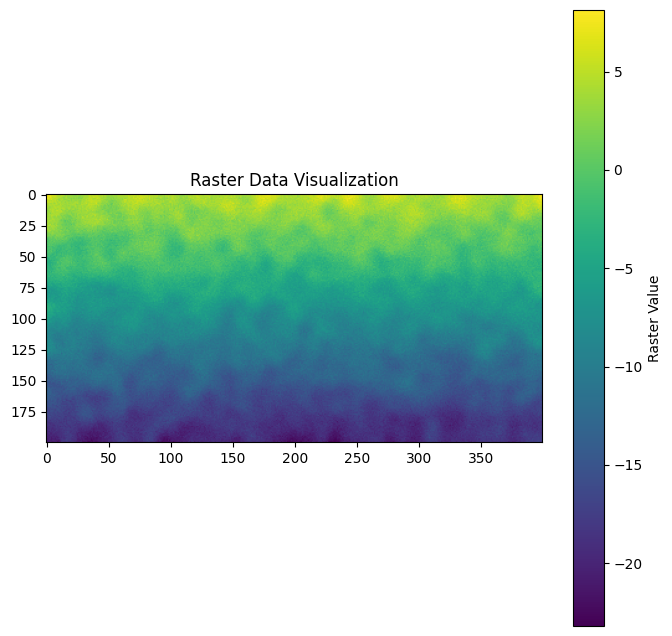

In [13]:
#Plot
plt.figure(figsize=(8,8))
plt.imshow(raster_bd1, cmap = 'viridis')
plt.colorbar(label = "Raster Value")
plt.title("Raster Data Visualization")
plt.show()

In [15]:
#Reading the raster data second band
raster_bd2 = src.read(2)

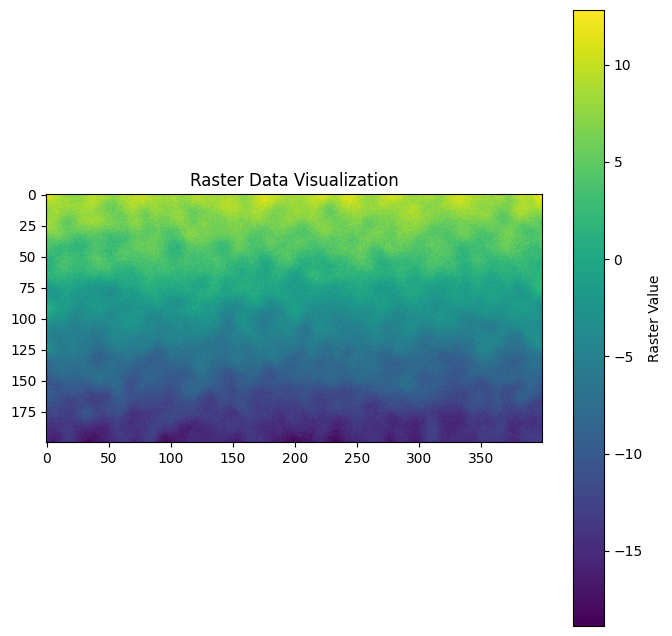

In [16]:
#Plot
plt.figure(figsize=(8,8))
plt.imshow(raster_bd2, cmap = 'viridis')
plt.colorbar(label = "Raster Value")
plt.title("Raster Data Visualization")
plt.show()

In [18]:
#Finding the number of bands in the raster file
num_bands = src.count
num_bands

12

In [20]:
# Reading all bands
raster_bd1 = src.read(1)
raster_bd2 = src.read(2)
raster_bd3 = src.read(3)
raster_bd1 = src.read(4)
raster_bd2 = src.read(5)
raster_bd3 = src.read(6)
raster_bd1 = src.read(7)
raster_bd2 = src.read(8)
raster_bd3 = src.read(9)
raster_bd1 = src.read(10)
raster_bd2 = src.read(11)
raster_bd3 = src.read(12)

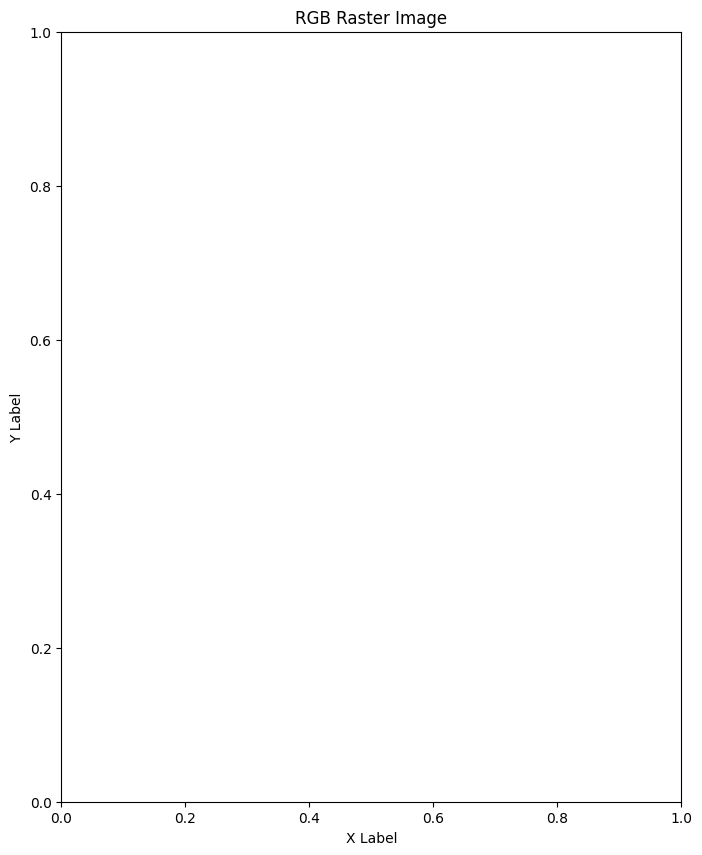

In [ ]:
#Stacking the bands into an RGB image
rgb = np.stack([raster_bd1,
                raster_bd2,
                raster_bd3,
                raster_bd1,
                raster_bd2,
                raster_bd3,
                raster_bd1,
                raster_bd2,
                raster_bd3,
                raster_bd1,
                raster_bd2,
                raster_bd3],
                axis = -1)

#Display RGB image
fig, ax = plt.subplots(figsize = (8,10))
#ax.imshow(rgb)

ax.set_title("RGB Raster Image")
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

plt.show()

EDA

In [44]:
df = pd.read_excel(r"data\District_avg_annual_temp_nepal.xlsx")
df.head()

,Unnamed: 0,District Name,1981,1982,1983,1984,1985,1986,1987,1988,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,1,ACHHAM,14.85,14.60,14.30,14.60,14.80,14.50,14.65,15.10,...,16.6,16.7,16.7,16.5,16.6,16.7,16.3,16.6,16.8,16.7
1,2,ARGHAKHANCHI,19.45,19.25,19.15,19.35,19.55,19.25,19.55,19.95,...,21.5,21.7,21.6,21.5,21.4,21.5,21.0,21.3,21.6,21.5
2,3,BAGLUNG,11.95,11.85,11.65,11.75,11.95,11.75,11.95,12.45,...,13.9,13.9,14.1,13.8,13.9,13.8,13.5,13.8,13.9,13.8
3,4,BAITADI,14.35,14.10,13.75,14.10,14.30,14.00,14.20,14.60,...,16.2,16.3,16.3,16.1,16.2,16.2,15.9,16.2,16.4,16.2
4,5,BAJHANG,2.35,2.15,1.80,2.15,2.35,2.00,2.15,2.60,...,4.2,4.2,4.3,4.1,4.2,4.2,3.9,4.2,4.3,4.2
